In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("zomato_clean.csv")
df.sample(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
7435,99 Pancakes,True,False,4.1,42,Church Street,Dessert Parlor,"Desserts, Ice Cream",150.0,"[('Rated 4.0', 'RATED\n Got the Nutella panca...",Delivery,Frazer Town
8946,Hotel Karavali,True,False,3.7,257,Jeevan Bhima Nagar,Quick Bites,"Biryani, North Indian, Mangalorean, Seafood",450.0,"[('Rated 1.0', 'RATED\n I wanted order food f...",Delivery,Indiranagar
9868,Chetty's Corner,True,False,3.6,21,Jayanagar,Quick Bites,"Fast Food, Burger",150.0,"[('Rated 3.0', ""RATED\n Chetty's corner is a ...",Delivery,Jayanagar


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25743 entries, 0 to 25742
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          25743 non-null  object 
 1   online_order  25743 non-null  bool   
 2   book_table    25743 non-null  bool   
 3   rate          25743 non-null  float64
 4   votes         25743 non-null  int64  
 5   location      25743 non-null  object 
 6   rest_type     25743 non-null  object 
 7   cuisines      25743 non-null  object 
 8   cost          25743 non-null  float64
 9   reviews_list  25743 non-null  object 
 10  type          25743 non-null  object 
 11  city          25743 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(7)
memory usage: 2.0+ MB


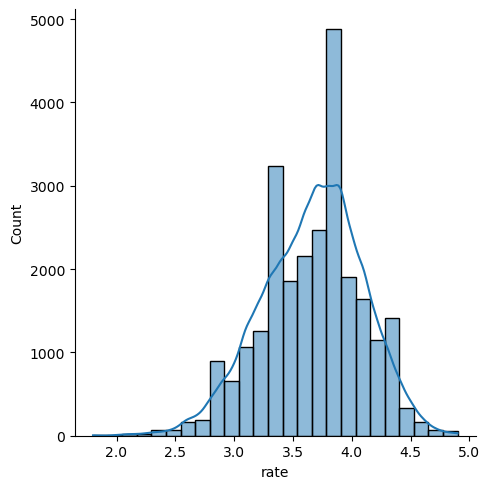

In [23]:
sns.displot(x = df['rate'], kde = True, bins = 25)

In [5]:
df.describe()

,rate,votes,cost
count,25743.000000,25743.000000,25743.000000
mean,3.667607,279.795129,553.251602
std,0.430644,727.987792,446.081417
min,1.800000,0.000000,40.000000
25%,3.400000,18.000000,300.000000
50%,3.700000,61.000000,400.000000
75%,4.000000,221.000000,650.000000
max,4.900000,16832.000000,6000.000000


In [6]:
df['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

/tmp/ipykernel_3512/2394954256.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df['city'], palette = 'mako')


<Axes: xlabel='count', ylabel='city'>

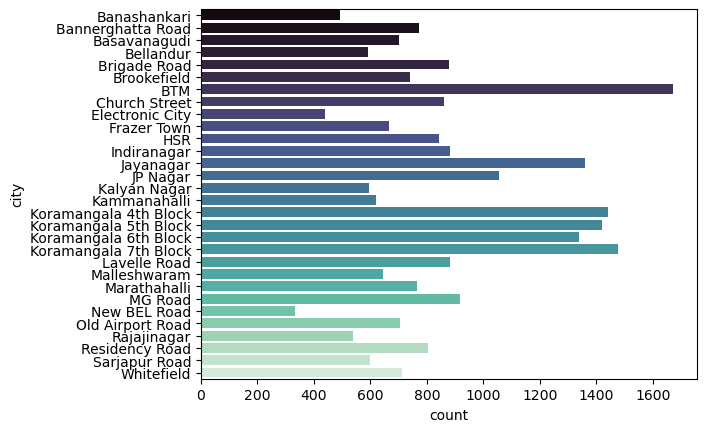

In [7]:
sns.countplot(y = df['city'], palette = 'mako')

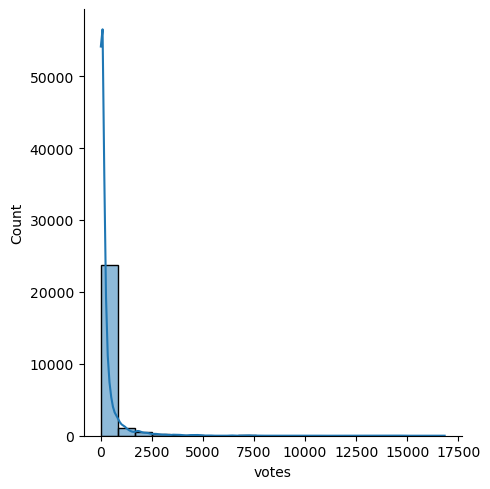

In [19]:
sns.displot(data = df['votes'], bins = 20, kde = True)

['Buffet' 'Cafes' 'Delivery' 'Desserts' 'Dine-out' 'Drinks & nightlife'
 'Pubs and bars']


/tmp/ipykernel_3512/2575125773.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df['type'], palette = 'mako')


<Axes: xlabel='count', ylabel='type'>

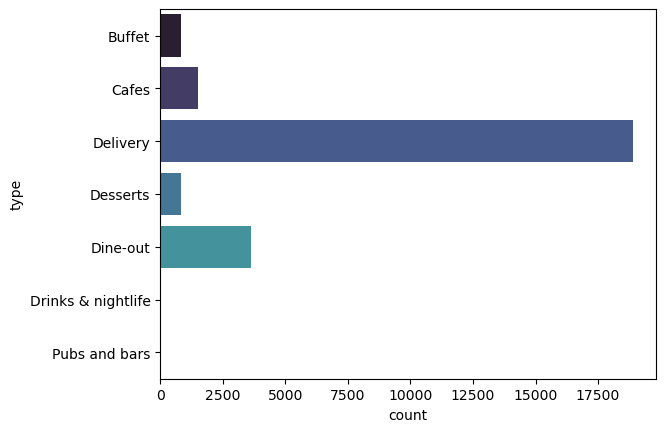

In [8]:
print(df['type'].unique())
sns.countplot(y = df['type'], palette = 'mako')

/tmp/ipykernel_3512/885354926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = x.index, x = x.values, palette = 'mako')


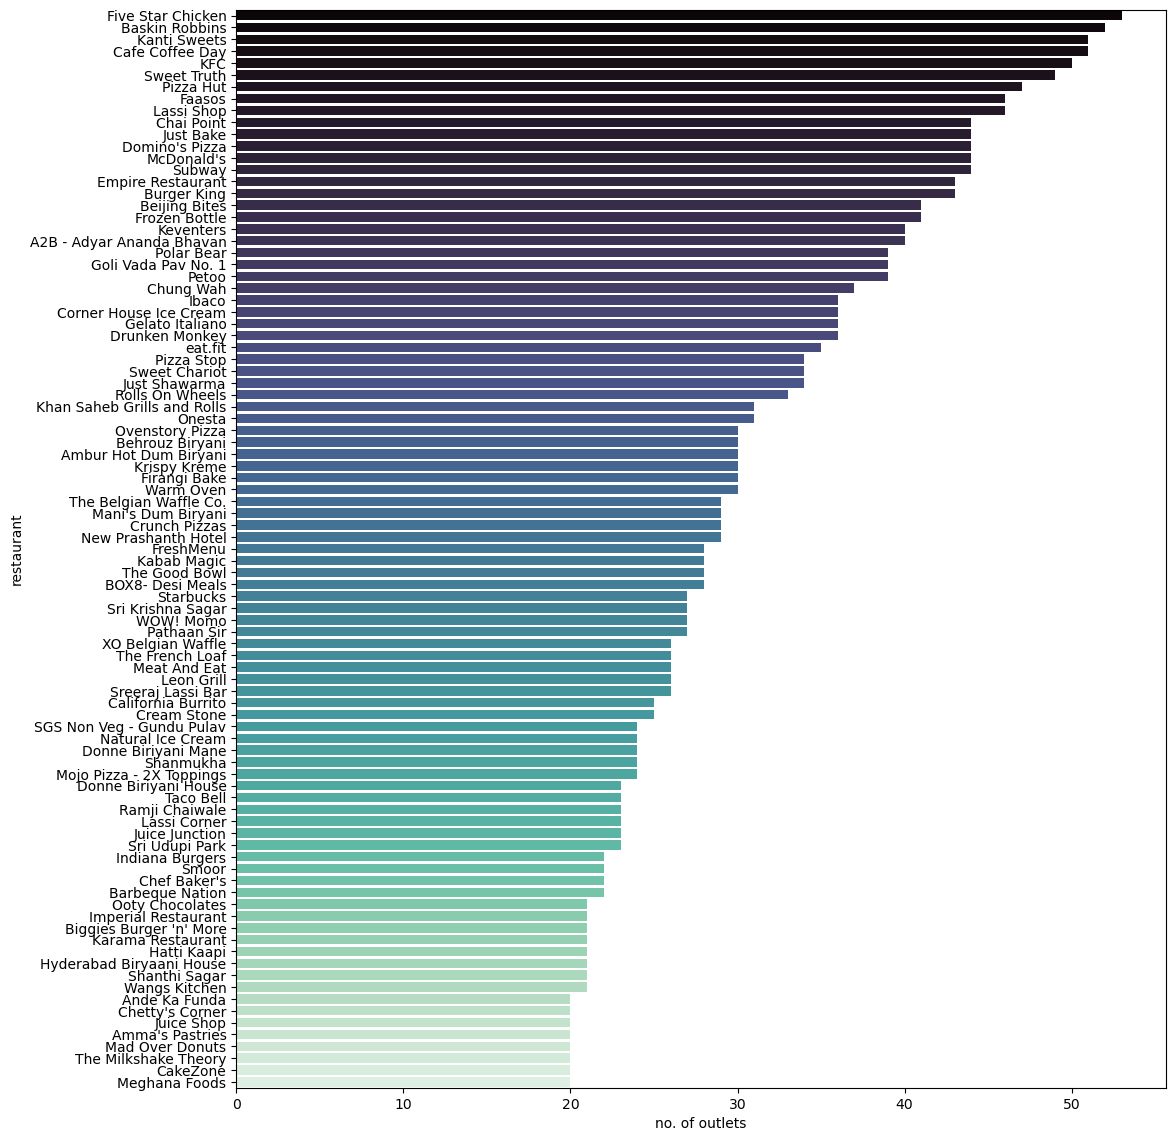

In [9]:
x = df['name'].value_counts()
x = x[x>=20]
plt.figure(figsize = (12, 14))
sns.barplot(y = x.index, x = x.values, palette = 'mako')
plt.xlabel('no. of outlets')
plt.ylabel('restaurant')
plt.show()

<Axes: xlabel='online_order', ylabel='count'>

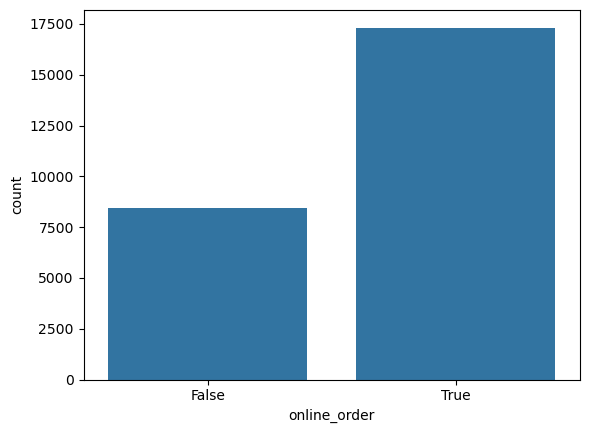

In [10]:
tmp = df['online_order'].index.tolist()
sns.countplot(x = 'online_order', data = df.loc[df['online_order'].isin(tmp)])

<Axes: xlabel='book_table', ylabel='count'>

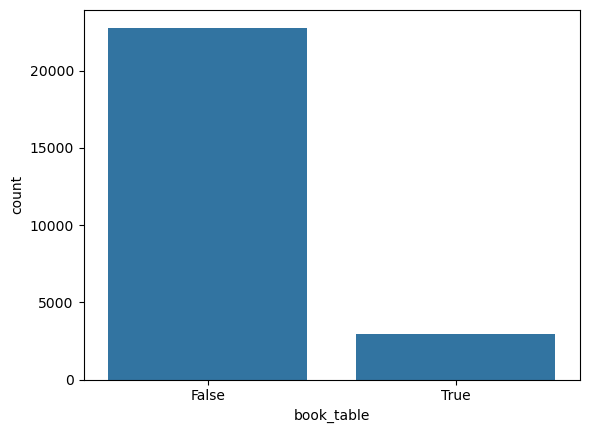

In [11]:
tmp = df['book_table'].index.tolist()
sns.countplot(x = 'book_table', data = df.loc[df['book_table'].isin(tmp)])

In [12]:
df.groupby(['location'])['rate'].mean().sort_values()

location
Bommanahalli             3.172277
Peenya                   3.200000
Old Madras Road          3.233333
Rammurthy Nagar          3.346154
West Bangalore           3.366667
                           ...   
St. Marks Road           3.935519
Koramangala 5th Block    3.935545
Koramangala 3rd Block    3.949474
Sankey Road              3.976471
Lavelle Road             4.103629
Name: rate, Length: 92, dtype: float64

/tmp/ipykernel_3512/2374352359.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cost_cat", y="rate",data = df, palette = 'Accent')


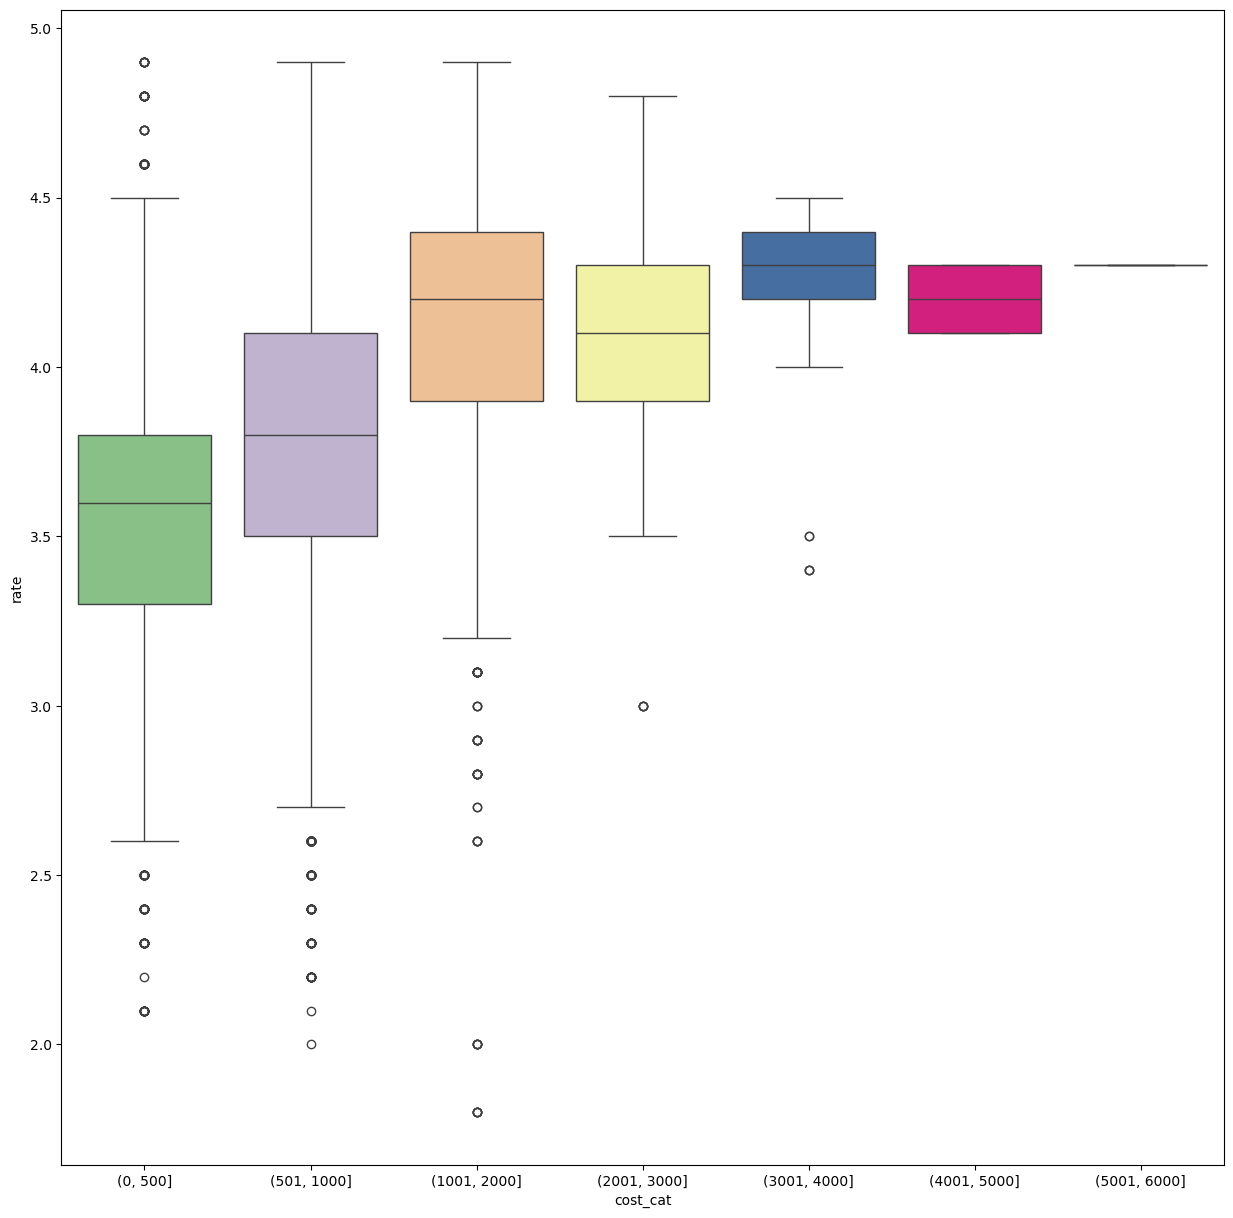

In [13]:
bins = pd.IntervalIndex.from_tuples([(0, 500), (501, 1000), (1001, 2000), (2001, 3000), (3001, 4000), (4001, 5000), (5001, 6000)])
df['cost_cat'] = pd.cut(df['cost'], bins)
plt.figure(figsize=(15,15))
sns.boxplot(x="cost_cat", y="rate",data = df, palette = 'Accent')
df.drop('cost_cat', axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25743 entries, 0 to 25742
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          25743 non-null  object 
 1   online_order  25743 non-null  bool   
 2   book_table    25743 non-null  bool   
 3   rate          25743 non-null  float64
 4   votes         25743 non-null  int64  
 5   location      25743 non-null  object 
 6   rest_type     25743 non-null  object 
 7   cuisines      25743 non-null  object 
 8   cost          25743 non-null  float64
 9   reviews_list  25743 non-null  object 
 10  type          25743 non-null  object 
 11  city          25743 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(7)
memory usage: 2.0+ MB


In [15]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

/tmp/ipykernel_3512/3101682622.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  loc_ = sns.barplot(data = x__, palette = 'Set1')
/tmp/ipykernel_3512/3101682622.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  loc_.set_xticklabels(loc_.get_xticklabels(), rotation=90, ha="right")


Text(0.5, 0, 'location')

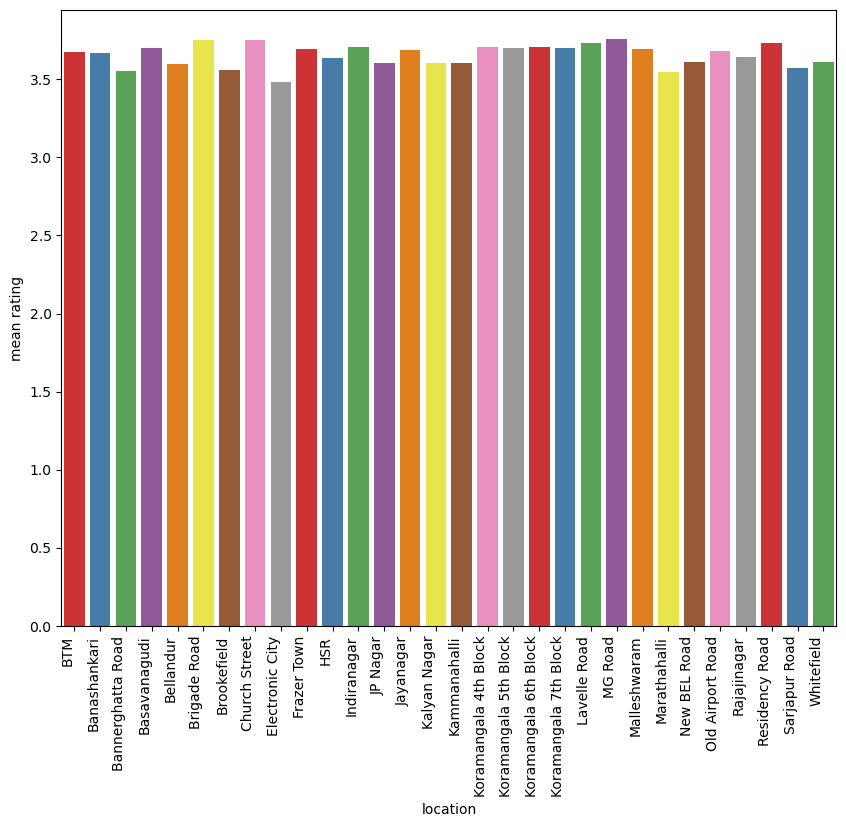

In [16]:
x__ = df.groupby('city')['rate'].mean()
plt.figure(figsize = (10, 8))
loc_ = sns.barplot(data = x__, palette = 'Set1')
loc_.set_xticklabels(loc_.get_xticklabels(), rotation=90, ha="right")
loc_
plt.ylabel('mean rating')
plt.xlabel('location')